In [3]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import explode, col

def get_spark_session():
    spark = SparkSession.builder \
        .appName("RecipeAnalysis2024") \
        .master("spark://spark-master:7070") \
        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
        .config("spark.mongodb.input.uri", "mongodb://mongo_db:27017/holiday_db.recipes_2024") \
        .config("spark.mongodb.output.uri", "mongodb://mongo_db:27017/holiday_db.results") \
        .getOrCreate()
    print("SparkSession created with version:", spark.version)
    return spark

spark = get_spark_session()

df = spark.read.format("mongo").load()



SparkSession created with version: 3.5.0


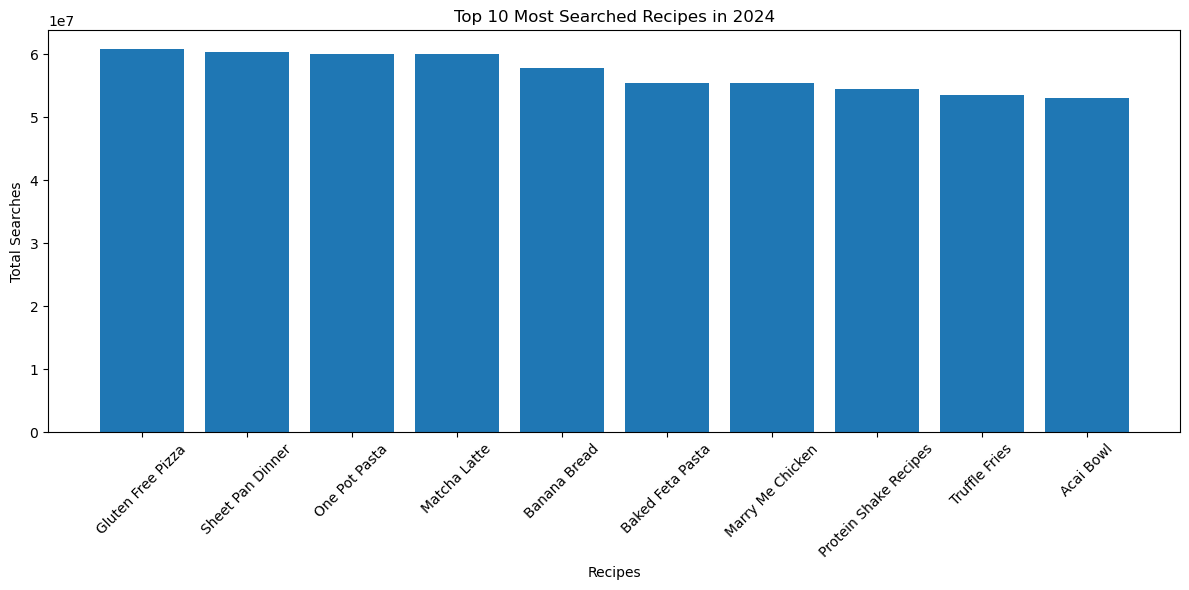

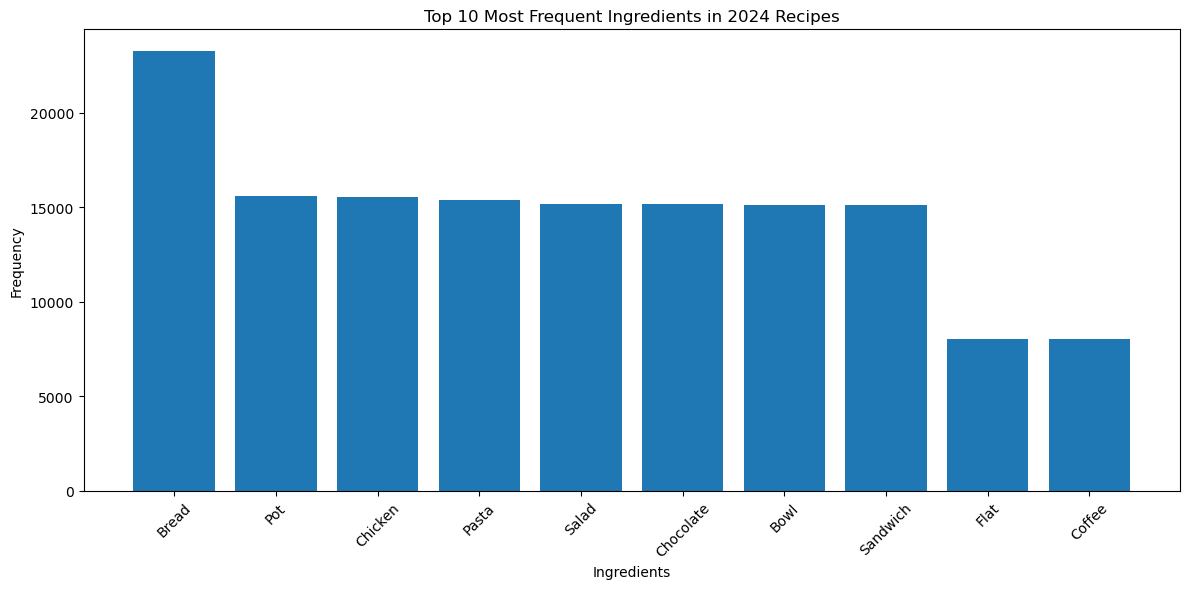

In [2]:
top_recipes = df.groupBy("keyword") \
                .sum("search_vol") \
                .withColumnRenamed("sum(search_vol)", "total_searches") \
                .orderBy("total_searches", ascending=False) \
                .limit(10)
top_recipes_pd = top_recipes.toPandas()

ingredients_df = df.select(explode("recipe").alias("ingredient")) \
                  .groupBy("ingredient") \
                  .count() \
                  .orderBy("count", ascending=False) \
                  .limit(10)
ingredients_pd = ingredients_df.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(top_recipes_pd['keyword'], top_recipes_pd['total_searches'])
plt.xticks(rotation=45)
plt.xlabel("Recipes")
plt.ylabel("Total Searches")
plt.title("Top 10 Most Searched Recipes in 2024")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(ingredients_pd['ingredient'], ingredients_pd['count'])
plt.xticks(rotation=45)
plt.xlabel("Ingredients")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Ingredients in 2024 Recipes")
plt.tight_layout()
plt.show()

In [2]:
row_count = df.count()

In [3]:
print(row_count)

200000


In [3]:
df.show(5, truncate=False)


+--------------------------+-------------+------------------------+----------------------------+----------+
|_id                       |id           |keyword                 |recipe                      |search_vol|
+--------------------------+-------------+------------------------+----------------------------+----------+
|{67c46419ca3319e073f73f0f}|recipe_2024_0|Porn Star Martini       |[Porn, Star, Martini]       |1418      |
|{67c46419ca3319e073f73f10}|recipe_2024_1|Chopped Italian Sandwich|[Chopped, Italian, Sandwich]|4521      |
|{67c46419ca3319e073f73f11}|recipe_2024_2|Acai Bowl               |[Acai, Bowl]                |6868      |
|{67c46419ca3319e073f73f12}|recipe_2024_3|Truffle Fries           |[Truffle, Fries]            |6855      |
|{67c46419ca3319e073f73f13}|recipe_2024_4|Air Fryer Chicken Wings |[Air, Fryer, Chicken, Wings]|3068      |
+--------------------------+-------------+------------------------+----------------------------+----------+
only showing top 5 rows



/tmp/ipykernel_381/3803495628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_recipes_pd, x="keyword", y="total_searches", palette="Blues_r")


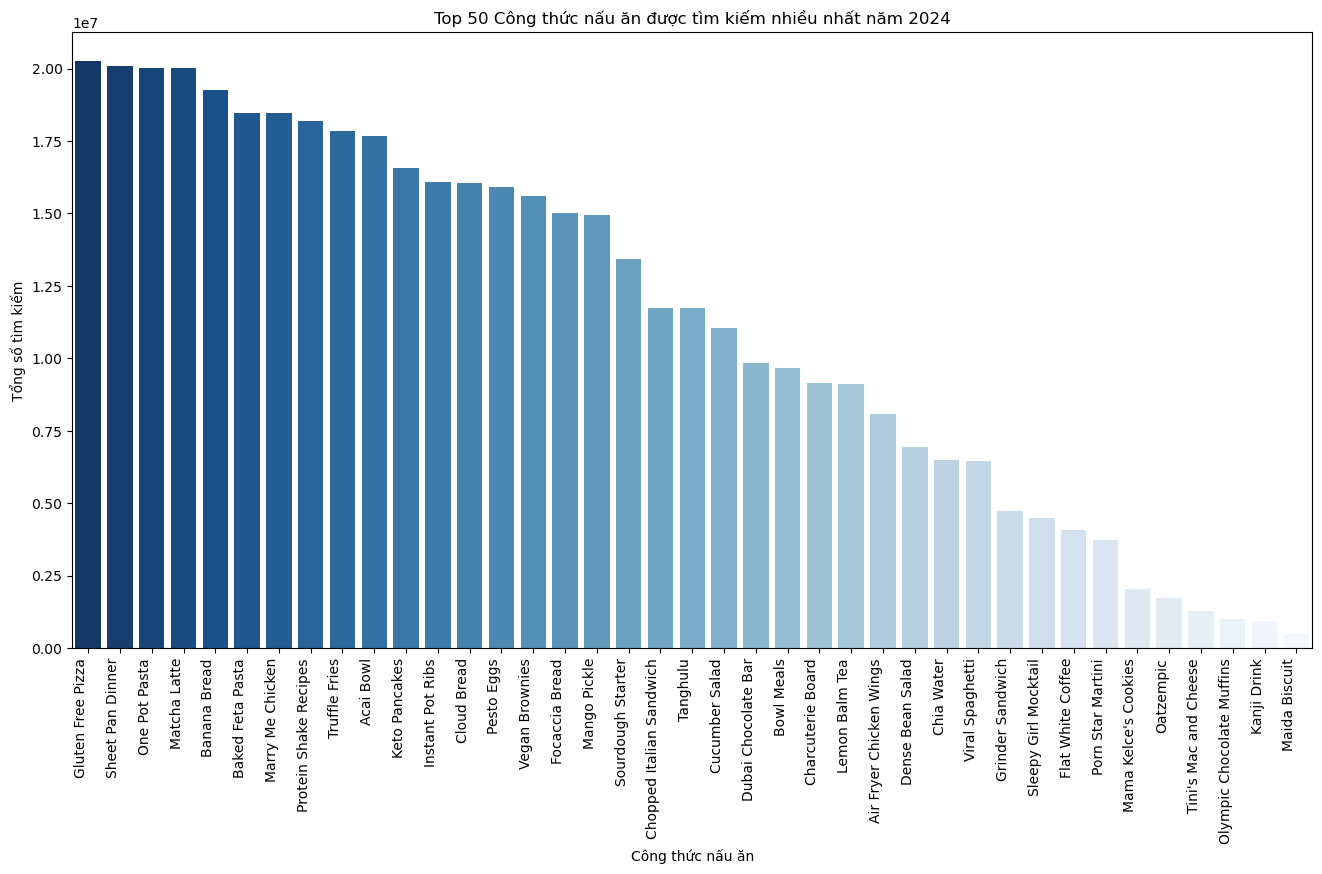

In [17]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc
import seaborn as sns

top_recipes = df.groupBy("keyword") \
                .sum("search_vol") \
                .withColumnRenamed("sum(search_vol)", "total_searches") \
                .orderBy(desc("total_searches")) \
                .limit(50)
top_recipes_pd = top_recipes.toPandas()
plt.figure(figsize=(16, 8))
sns.barplot(data=top_recipes_pd, x="keyword", y="total_searches", palette="Blues_r")
plt.xticks(rotation=90, ha='right')
plt.xlabel("Công thức nấu ăn")
plt.ylabel("Tổng số tìm kiếm")
plt.title("Top 50 Công thức nấu ăn được tìm kiếm nhiều nhất năm 2024")
plt.show()


In [18]:
top_recipes_pd.head()

,keyword,total_searches
0,Gluten Free Pizza,20248352
1,Sheet Pan Dinner,20099322
2,One Pot Pasta,20005586
3,Matcha Latte,20000260
4,Banana Bread,19269914


In [2]:
df_pd = df.toPandas()

print(df_pd.head())


                           _id             id                   keyword  \
0  (67c46419ca3319e073f73f0f,)  recipe_2024_0         Porn Star Martini   
1  (67c46419ca3319e073f73f10,)  recipe_2024_1  Chopped Italian Sandwich   
2  (67c46419ca3319e073f73f11,)  recipe_2024_2                 Acai Bowl   
3  (67c46419ca3319e073f73f12,)  recipe_2024_3             Truffle Fries   
4  (67c46419ca3319e073f73f13,)  recipe_2024_4   Air Fryer Chicken Wings   

                         recipe  search_vol  
0         [Porn, Star, Martini]        1418  
1  [Chopped, Italian, Sandwich]        4521  
2                  [Acai, Bowl]        6868  
3              [Truffle, Fries]        6855  
4  [Air, Fryer, Chicken, Wings]        3068  


In [11]:
print(df_pd['id'])

0            recipe_2024_0
1            recipe_2024_1
2            recipe_2024_2
3            recipe_2024_3
4            recipe_2024_4
               ...        
99995    recipe_2024_49995
99996    recipe_2024_49996
99997    recipe_2024_49997
99998    recipe_2024_49998
99999    recipe_2024_49999
Name: id, Length: 100000, dtype: object


In [12]:
df_pd['keyword'].unique()

array(['Porn Star Martini', 'Chopped Italian Sandwich', 'Acai Bowl',
       'Truffle Fries', 'Air Fryer Chicken Wings', 'Charcuterie Board',
       'Oatzempic', "Mama Kelce's Cookies", 'One Pot Pasta',
       'Keto Pancakes', "Tini's Mac and Cheese", 'Gluten Free Pizza',
       'Tanghulu', 'Banana Bread', 'Sheet Pan Dinner',
       'Flat White Coffee', 'Cucumber Salad', 'Lemon Balm Tea',
       'Vegan Brownies', 'Olympic Chocolate Muffins', 'Matcha Latte',
       'Marry Me Chicken', 'Pesto Eggs', 'Protein Shake Recipes',
       'Dense Bean Salad', 'Chia Water', 'Mango Pickle',
       'Instant Pot Ribs', 'Focaccia Bread', 'Sourdough Starter',
       'Maida Biscuit', 'Dubai Chocolate Bar', 'Baked Feta Pasta',
       'Grinder Sandwich', 'Cloud Bread', 'Kanji Drink', 'Bowl Meals',
       'Viral Spaghetti', 'Sleepy Girl Mocktail'], dtype=object)

In [16]:
df_pd['recipe'].value_counts()

recipe
[Flat, White, Coffee]            2668
[Sourdough, Starter]             2666
[Protein, Shake, Recipes]        2660
[Banana, Bread]                  2642
[Cloud, Bread]                   2630
[Kanji, Drink]                   2622
[Porn, Star, Martini]            2618
[Charcuterie, Board]             2616
[One, Pot, Pasta]                2610
[Dense, Bean, Salad]             2598
[Marry, Me, Chicken]             2596
[Air, Fryer, Chicken, Wings]     2594
[Instant, Pot, Ribs]             2594
[Lemon, Balm, Tea]               2594
[Truffle, Fries]                 2586
[Mama, Kelce's, Cookies]         2584
[Chopped, Italian, Sandwich]     2584
[Tini's, Mac, and, Cheese]       2570
[Sheet, Pan, Dinner]             2566
[Tanghulu]                       2560
[Acai, Bowl]                     2558
[Sleepy, Girl, Mocktail]         2548
[Keto, Pancakes]                 2546
[Mango, Pickle]                  2544
[Olympic, Chocolate, Muffins]    2542
[Viral, Spaghetti]               2542
[Maid

/tmp/ipykernel_381/3726461054.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


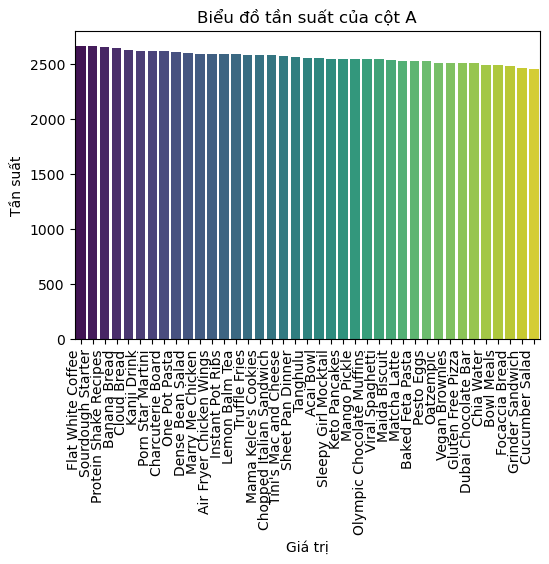

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = df_pd['keyword'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

plt.xticks(rotation=90, ha='right')
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.title("Biểu đồ tần suất của cột A")

plt.show()


Dữ liệu ban đầu:
+--------------------------+--------------+------------------------+----------------------------+----------+
|_id                       |id            |keyword                 |recipe                      |search_vol|
+--------------------------+--------------+------------------------+----------------------------+----------+
|{67c46419ca3319e073f73f0f}|recipe_2024_0 |Porn Star Martini       |[Porn, Star, Martini]       |1418      |
|{67c46419ca3319e073f73f10}|recipe_2024_1 |Chopped Italian Sandwich|[Chopped, Italian, Sandwich]|4521      |
|{67c46419ca3319e073f73f11}|recipe_2024_2 |Acai Bowl               |[Acai, Bowl]                |6868      |
|{67c46419ca3319e073f73f12}|recipe_2024_3 |Truffle Fries           |[Truffle, Fries]            |6855      |
|{67c46419ca3319e073f73f13}|recipe_2024_4 |Air Fryer Chicken Wings |[Air, Fryer, Chicken, Wings]|3068      |
|{67c46419ca3319e073f73f14}|recipe_2024_5 |Charcuterie Board       |[Charcuterie, Board]        |3458      |
|{

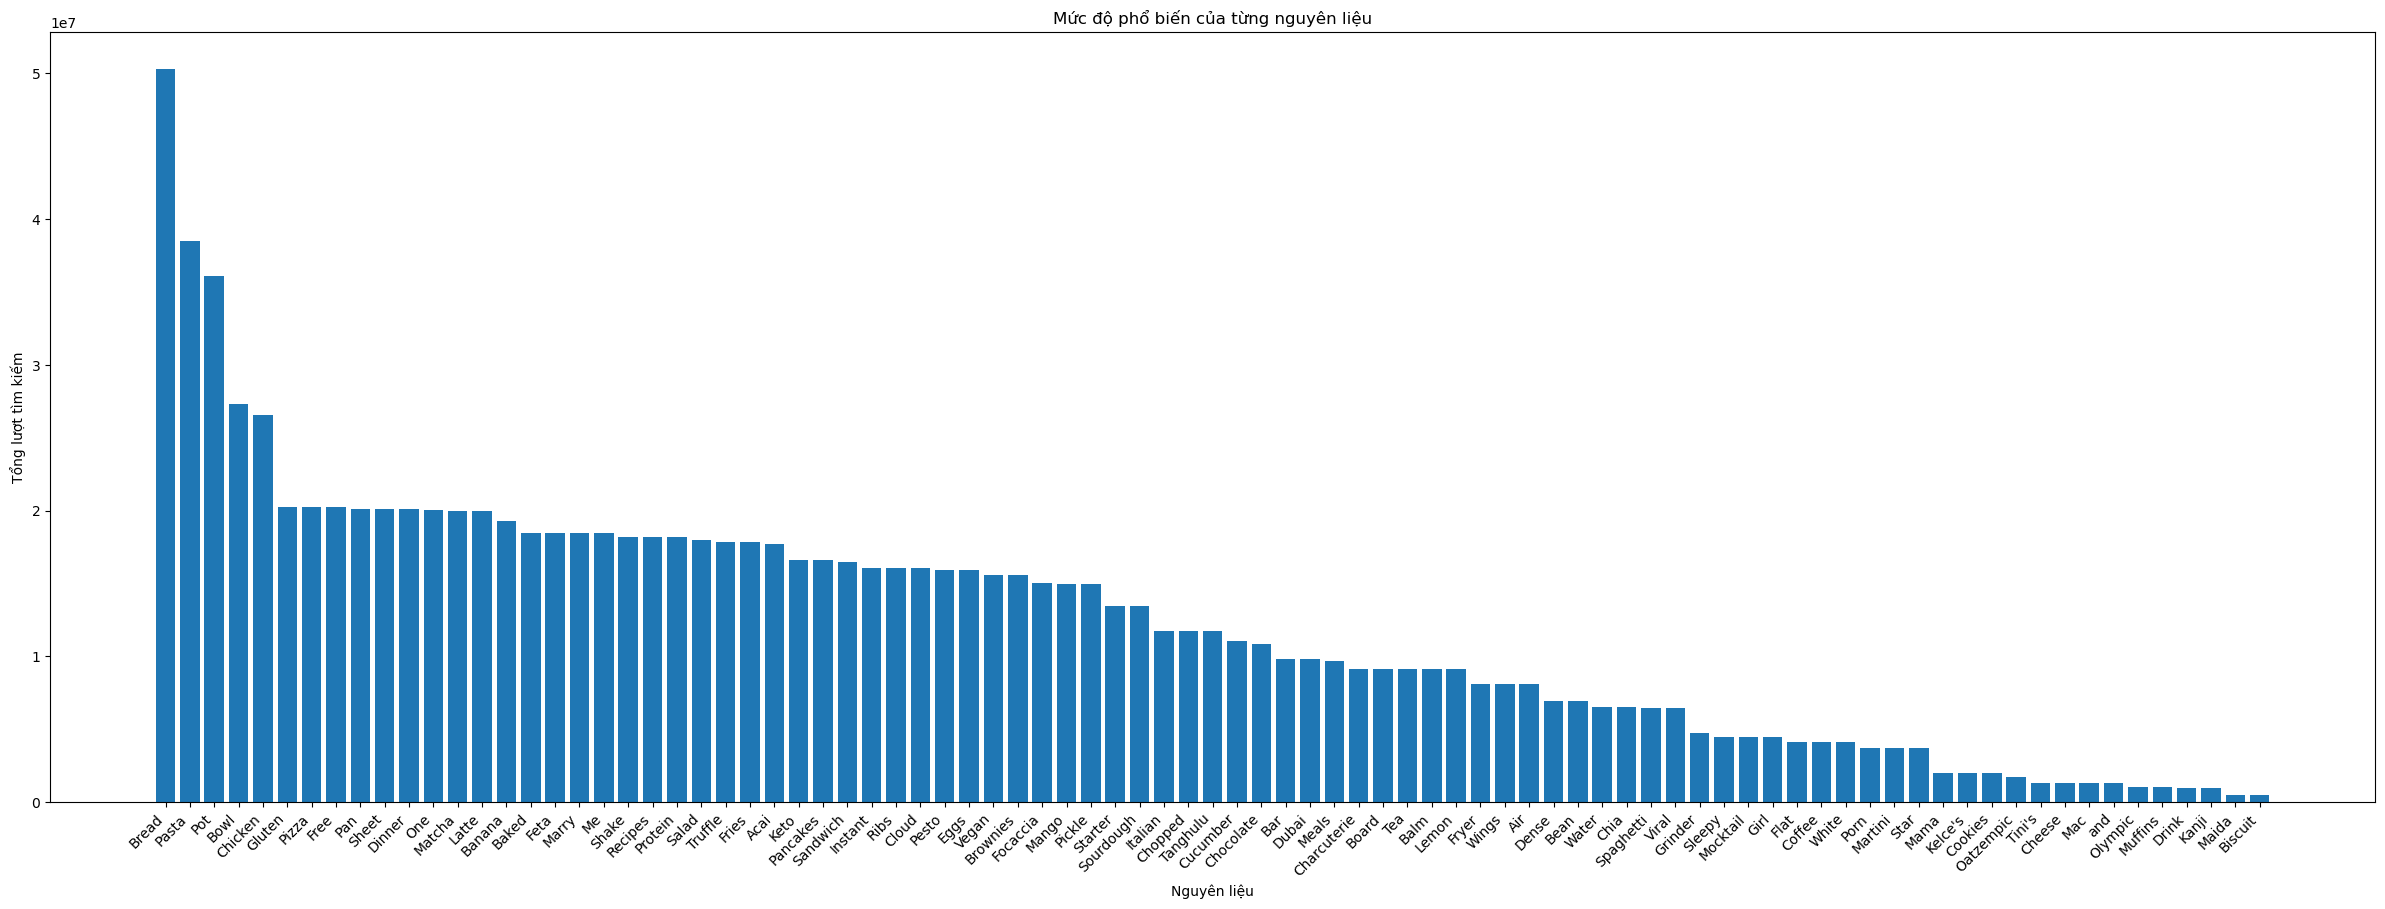

In [28]:
print("Dữ liệu ban đầu:")
df.show(truncate=False)

top_recipe = df.orderBy(col("search_vol").desc()).limit(5)
print("\nTop 5 công thức được tìm kiếm nhiều nhất:")
top_recipe.show()

ingredient_df = df.select(explode(col("recipe")).alias("ingredient"), "search_vol")
ingredient_popularity = ingredient_df.groupBy("ingredient").sum("search_vol").orderBy(col("sum(search_vol)").desc())

print("\nMức độ phổ biến của từng nguyên liệu:")
ingredient_popularity.show()

ingredient_pd = ingredient_popularity.toPandas()
plt.figure(figsize=(30, 10))
plt.bar(ingredient_pd["ingredient"], ingredient_pd["sum(search_vol)"])
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nguyên liệu")
plt.ylabel("Tổng lượt tìm kiếm")
plt.title("Mức độ phổ biến của từng nguyên liệu")
plt.xticks(rotation=45)
plt.show()

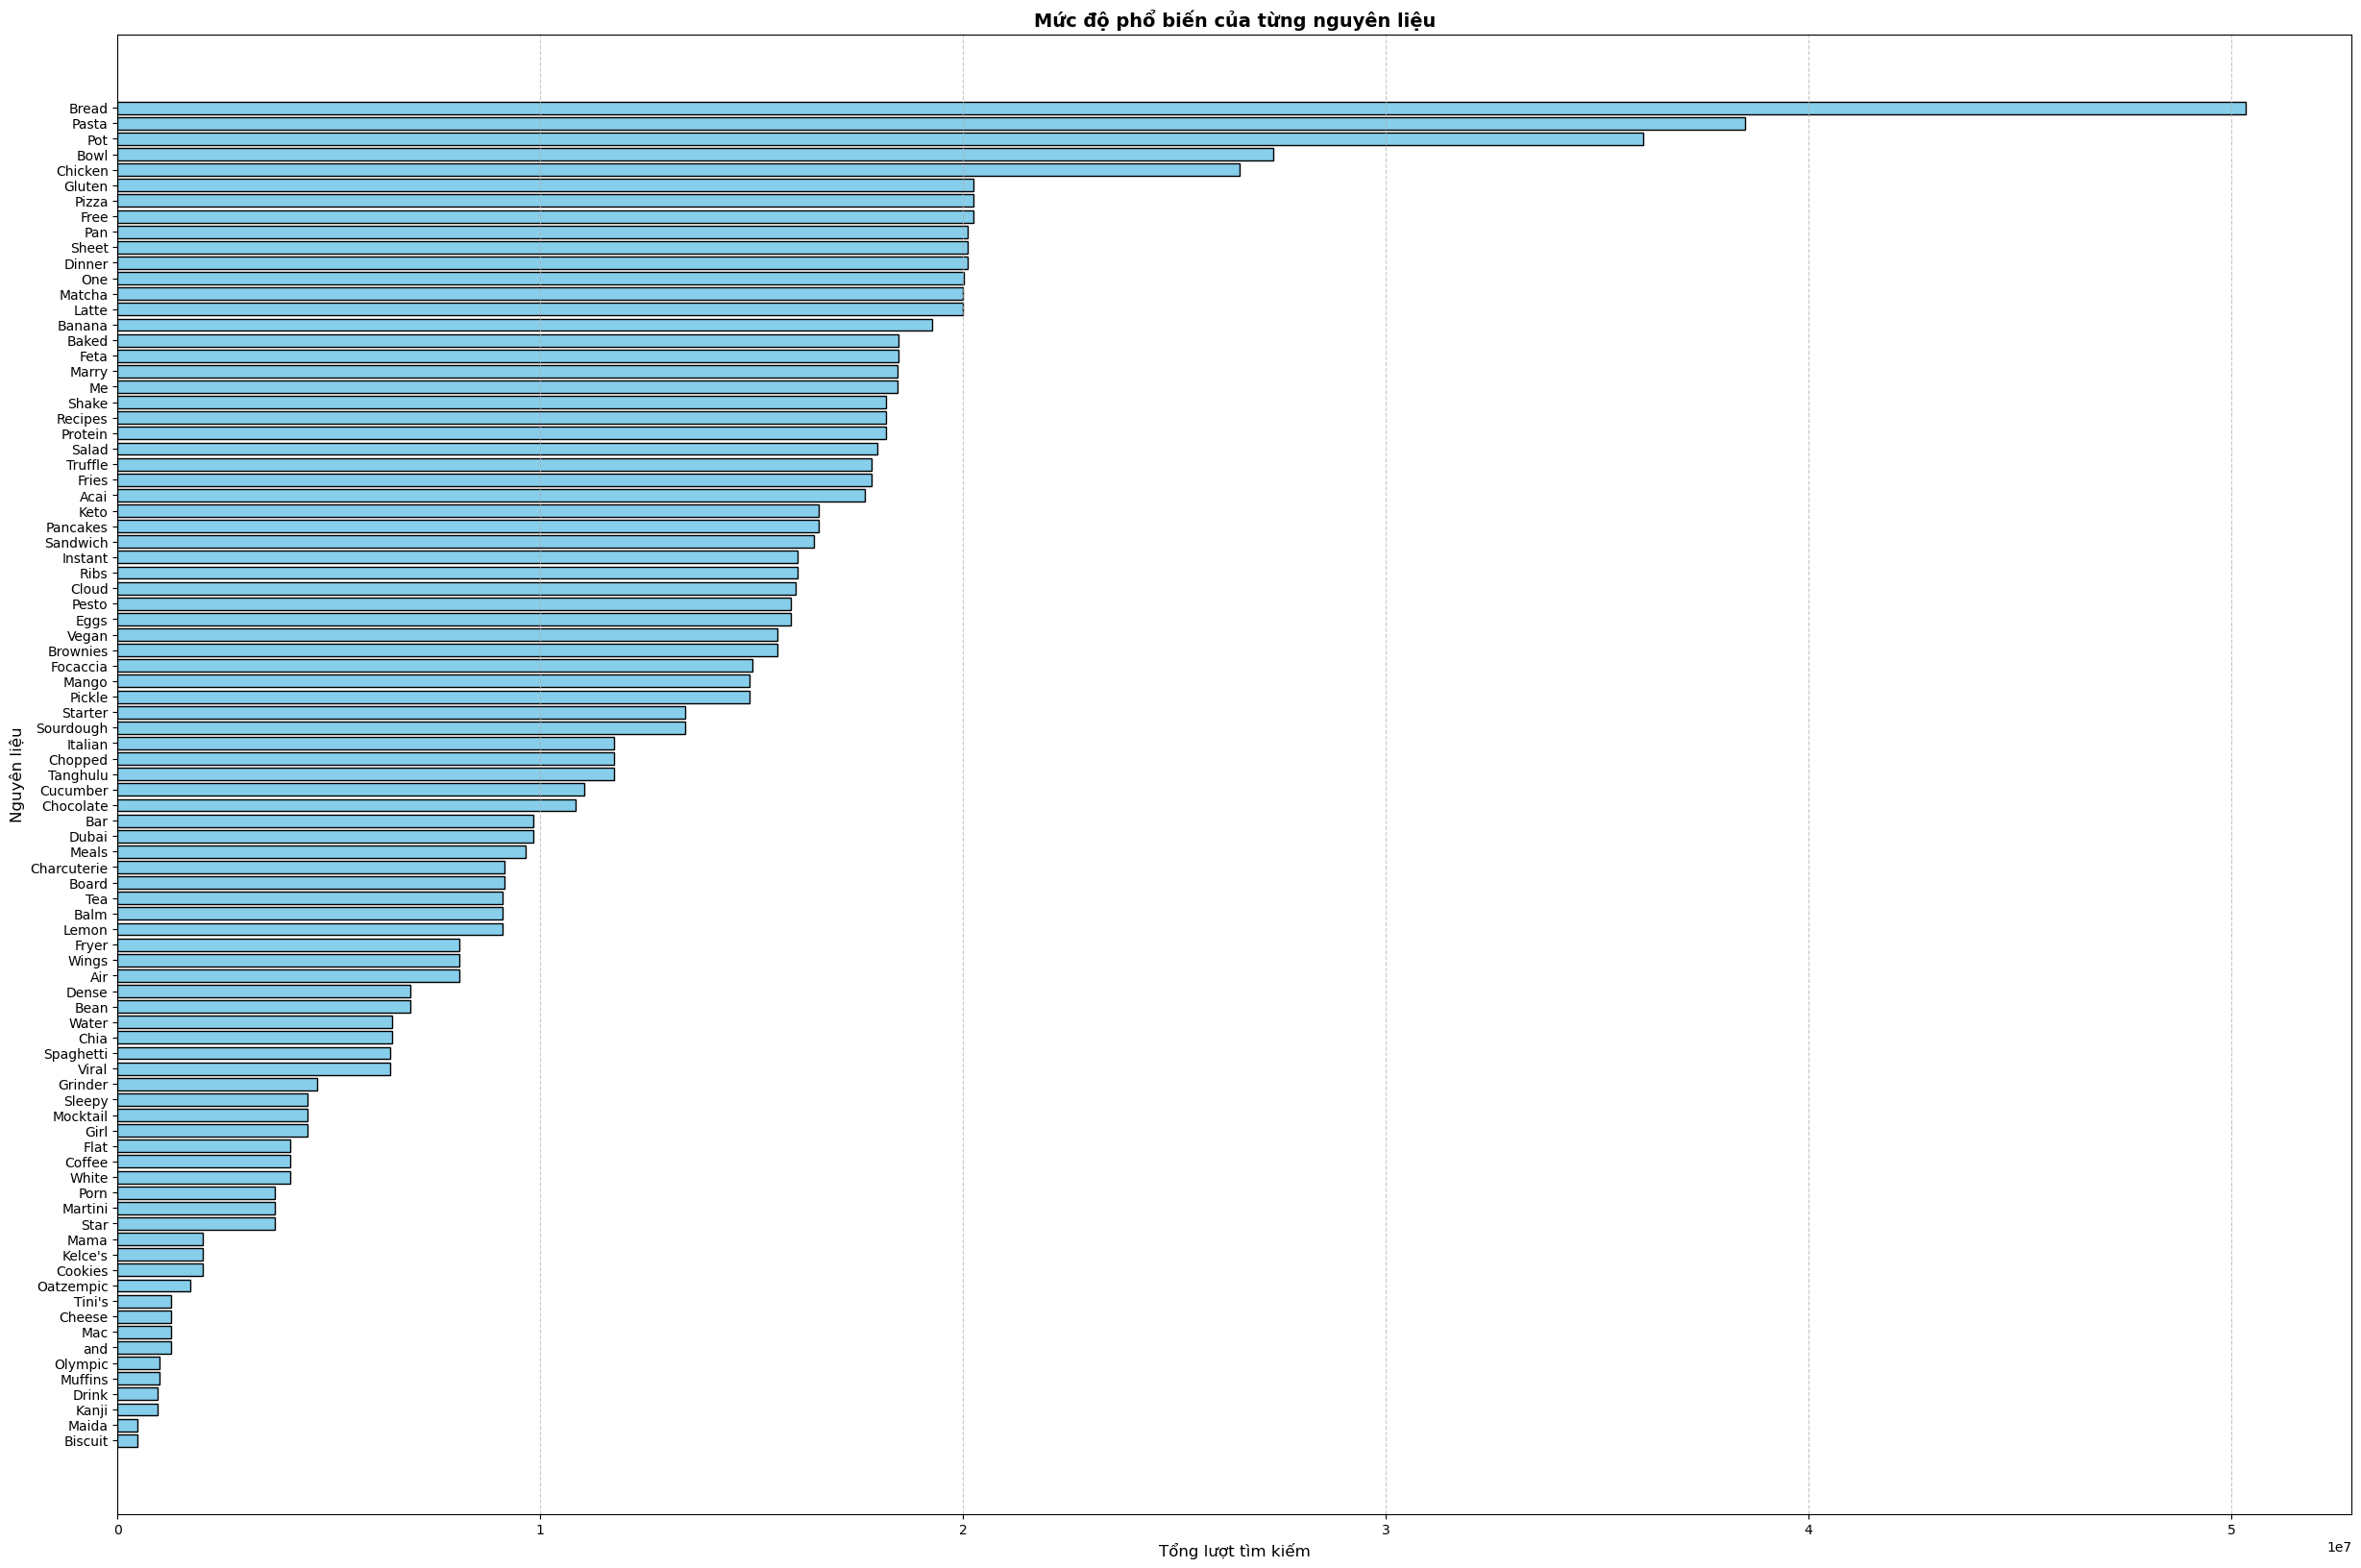

In [32]:
ingredient_pd = ingredient_popularity.toPandas()
plt.figure(figsize=(30,20))
plt.barh(ingredient_pd["ingredient"], ingredient_pd["sum(search_vol)"], color='skyblue', edgecolor='black')
plt.xlabel("Tổng lượt tìm kiếm", fontsize=12)
plt.ylabel("Nguyên liệu", fontsize=12)
plt.title("Mức độ phổ biến của từng nguyên liệu", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [35]:
from pyspark.sql.functions import explode, col, collect_list
ingredient_group = df.select(explode(col("recipe")).alias("ingredient"), "keyword").groupBy("ingredient").agg(collect_list("keyword").alias("related_recipes"))
print("\nNhóm công thức theo thành phần:")
# ingredient_group.show(truncate=False)


Nhóm công thức theo thành phần:


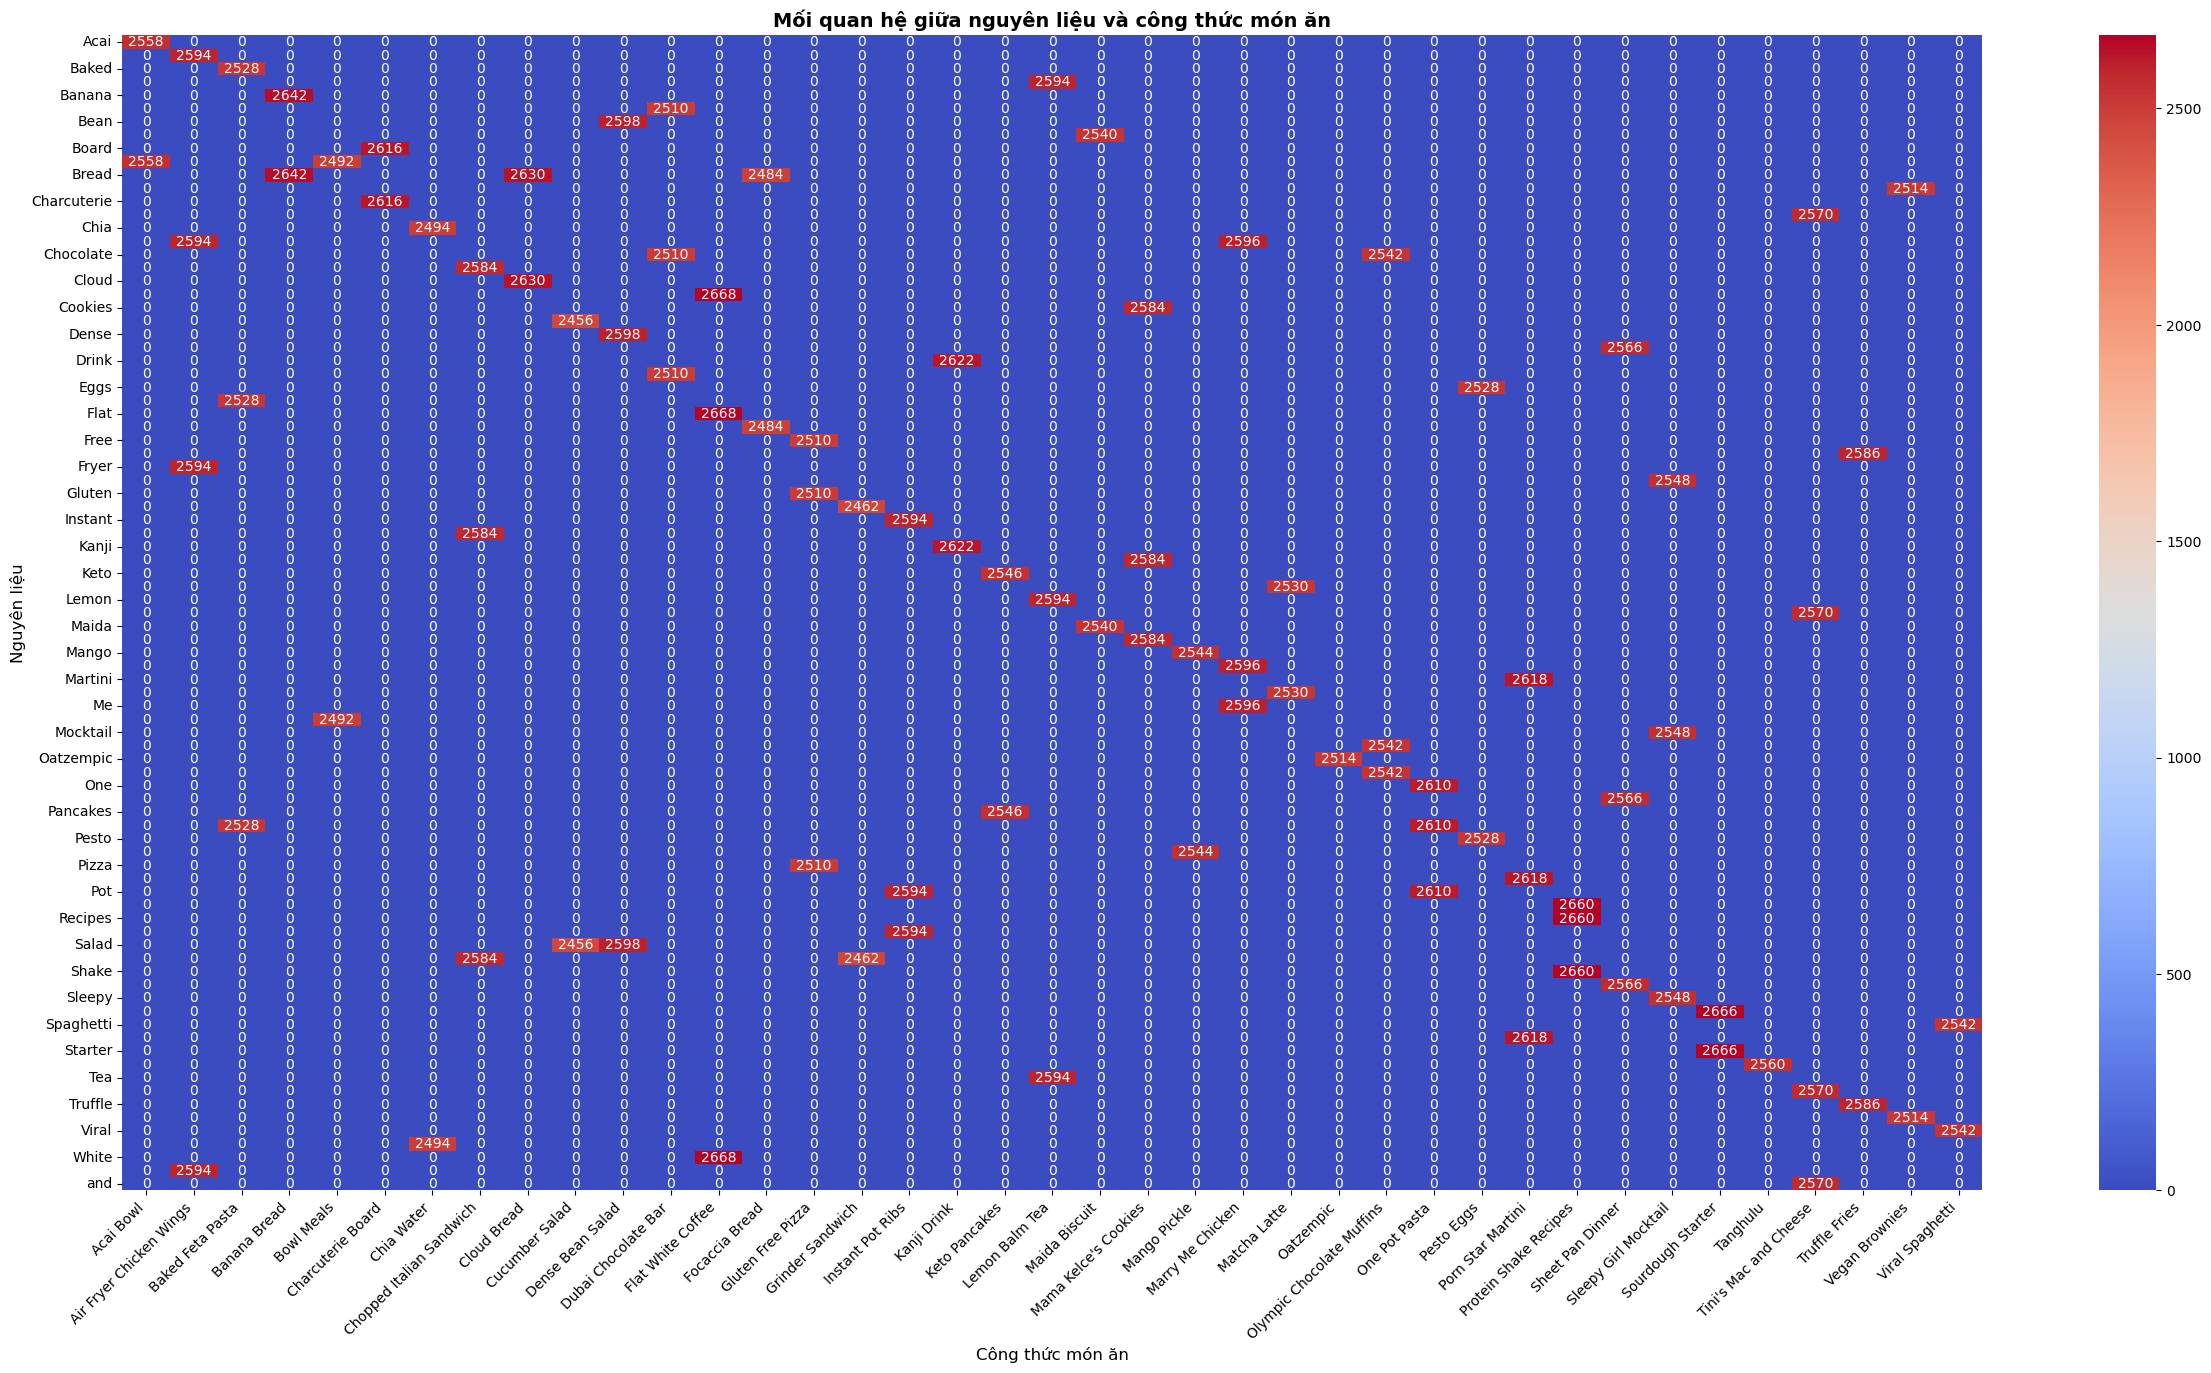

In [47]:
ingredient_group_pd = ingredient_group.toPandas()
plt.figure(figsize=(30, 15))
sns.heatmap(pd.DataFrame(ingredient_group_pd.explode("related_recipes").groupby(["ingredient", "related_recipes"]).size().unstack().fillna(0)), cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Công thức món ăn", fontsize=12)
plt.ylabel("Nguyên liệu", fontsize=12)
plt.title("Mối quan hệ giữa nguyên liệu và công thức món ăn", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import explode, col, collect_list
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
# 5. Xây dựng mô hình dự đoán xu hướng tìm kiếm
df_pd = df.toPandas()
df_pd["recipe_length"] = df_pd["recipe"].apply(len)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_pd[["recipe_length"]]
y = df_pd["search_vol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# Dự đoán xu hướng
y_pred = model.predict(X_test_scaled)

# Hiển thị kết quả dự đoán
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Dữ liệu thực tế")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label="Dự đoán lý tưởng")
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Dự đoán xu hướng tìm kiếm công thức")
plt.legend()
plt.grid(True)
plt.show()